## Time Series: Demand Forecasting for Bakery

In [4]:
# First, import the relevant modules
import requests
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

<b>Problem 2: image is not displayed, both when using a command and img tag:</b>

In [5]:
os.chdir('C:/Sereda/Lectures/Springboard/Projects/7.6.Capstone2_Data_Wrangling')

![]("jpg/bakery.jpg")
![](jpg/chedraui-bakery-1.jpg)

<img src="jpg/bakery.jpg"/> <img src="jpg/chedraui-bakery-1.jpg"/><br>
Bakery products in Chedraui supermarket.

Let's focus on bakery demand forecasting for <b>Chedraui supermarket in Playa del Carmen</b>, Mexico.

In [6]:
shop = "CHEDRAUI PLAYA DEL CARMEN"

Find it in the list of 935362 clients of Grupo Bimbo bakery producer.

In [16]:
df=pd.read_csv('csv.grupo_bimbo/cliente_tabla.csv')
df.head()

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT


Determine ID of our shop.

In [17]:
tmp = df[df.NombreCliente == shop]
tmp

,Cliente_ID,NombreCliente
48214,116501,CHEDRAUI PLAYA DEL CARMEN


In [18]:
type(tmp)

pandas.core.frame.DataFrame

In [19]:
# convert dataframe to a scalar
id = tmp.iloc[0,0].item()
id

116501

In [204]:
del df # clean memory

### Products (bakery)

In [9]:
products=pd.read_csv('csv.grupo_bimbo/producto_tabla.csv')
products.head()

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


In [25]:
def product_name(Producto_ID):
    """Return a bakery product name, given product ID."""
    tmp = products[products.Producto_ID == Producto_ID]
    return tmp.iloc[0,1]

In [26]:
product_name(41)

'Bimbollos Ext sAjonjoli 6p 480g BIM 41'

In [ ]:
help(product_name)

### Bakery Demand data

Extract data for our shop from a large *.csv.
#### Using iterators to load large files into memory
https://campus.datacamp.com/courses/python-data-science-toolbox-part-2/using-iterators-in-pythonland?ex=10

In [113]:
pwd # check your current location

'C:\\Sereda\\Lectures\\Springboard\\Projects\\7.6.Capstone2_Data_Wrangling'

How to append a list as a row to a Pandas DataFrame in Python?

https://www.geeksforgeeks.org/how-to-append-a-list-as-a-row-to-a-pandas-dataframe-in-python/#:~:text=%20Let%E2%80%99s%20append%20the%20list%20with%20step-wise%3A%20,new%20list%20to%20a%20data%20frame.%20More%20

In [127]:
# DataFrame of results
col_names = ['Semana','Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID','Producto_ID','Venta_uni_hoy','Venta_hoy','Dev_uni_proxima','Dev_proxima','Demanda_uni_equil']
search_result = pd.DataFrame(columns=col_names) # empty DataFrame
for chunk in pd.read_csv('csv.grupo_bimbo/train.csv', chunksize=1000):
    match = chunk.loc[chunk['Cliente_ID'] == id] # find records with our shop ID
    # If not empty,
    if len(match) > 0:
        match = pd.DataFrame(match, columns=col_names)
        search_result = search_result.append(match) # append the results of search from current chunk
search_result.drop(['Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID'], axis=1, inplace=True)
search_result.head() # 4:36:12 - ?

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
9739698,3,2251,2,1501,116501,2665,180,2970.00,0,0.0,180
9739699,3,2251,2,1501,116501,30572,47,319.60,0,0.0,47
9739700,3,2251,2,1501,116501,30575,94,639.20,0,0.0,94
9739701,3,2251,2,1501,116501,31310,66,427.68,0,0.0,66
9739702,3,2251,2,1501,116501,31502,39,624.00,0,0.0,39


In [131]:
# Change column names to English
search_result.columns = ['Week','Product_ID','Qty_sold','Revenue','Qty_return','Revenue_return','Demand_equil']
pd.set_option('display.max_rows', 500)
display(search_result)

,Week,Product_ID,Qty_sold,Revenue,Qty_return,Revenue_return,Demand_equil
9739698,3,2665,180,2970.00,0,0.0,180
9739699,3,30572,47,319.60,0,0.0,47
9739700,3,30575,94,639.20,0,0.0,94
9739701,3,31310,66,427.68,0,0.0,66
9739702,3,31502,39,624.00,0,0.0,39
9739703,3,31520,10,334.40,0,0.0,10
9739704,3,31588,20,256.00,0,0.0,20
9739705,3,31596,6,211.20,0,0.0,6
9739706,3,32303,88,689.92,0,0.0,88
9739707,3,32962,10,168.00,0,0.0,10


### Exploratory Data Analysis

In [178]:
search_result['Qty_return'].unique()

array([0], dtype=object)

There were no returned items, which means that all of them were sold.

In [177]:
search_result['Revenue_return'].unique()

array([0.])

In [181]:
(search_result['Qty_sold'] == search_result['Demand_equil']).unique()

array([ True])

'Qty_sold' column has the same values as 'Demand_equil' column.

In [182]:
demand = search_result.drop(['Qty_sold', 'Qty_return', 'Revenue_return'], axis = 1)
demand.head()

,Week,Product_ID,Revenue,Demand_equil
9739698,3,2665,2970.00,180
9739699,3,30572,319.60,47
9739700,3,30575,639.20,94
9739701,3,31310,427.68,66
9739702,3,31502,624.00,39


#### Select one of the products by Product_ID

In [183]:
def demand_plot(product_id):
    product_demand = demand.loc[demand['Product_ID'] == product_id];
    display(product_demand)
    plt.plot(product_demand['Week'], product_demand['Demand_equil']);
    plt.title(product_name(id));
    plt.xlabel('Week');
    plt.xlabel('Demand');

,Week,Product_ID,Revenue,Demand_equil
9739698,3,2665,2970.0,180
20712646,4,2665,1485.0,90
51991823,7,2665,2277.0,138
62392293,8,2665,297.0,18
72817032,9,2665,2970.0,180


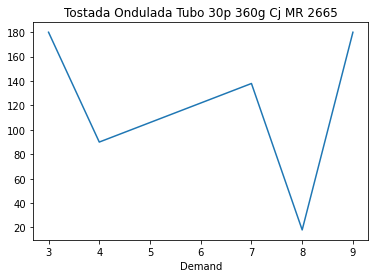

In [184]:
demand_plot(2665)

There are many products with sparse data on demand! Let's count datapoints for each product.

In [203]:
def demand_count(product_id):
    product_demand = demand.loc[demand['Product_ID'] == product_id]
    return product_demand.shape[0]

In [204]:
demand_count(2665)

5

In [210]:
print("id\tdemand_count")
for id in demand['Product_ID']:
    print(id, "\t", demand_count(id))

id	demand_count
2665 	 5
30572 	 2
30575 	 1
31310 	 3
31502 	 2
31520 	 2
31588 	 1
31596 	 2
32303 	 4
32962 	 3
34054 	 7
34204 	 7
34206 	 7
34210 	 7
34211 	 7
34212 	 7
34264 	 7
34785 	 7
34786 	 7
34794 	 7
34802 	 7
34865 	 7
34914 	 7
35142 	 7
35145 	 7
35148 	 7
35728 	 7
37058 	 2
43014 	 2
43038 	 7
43039 	 7
43059 	 2
43060 	 7
43069 	 2
43136 	 7
43158 	 2
43159 	 7
43161 	 7
43169 	 5
43173 	 7
43174 	 6
43180 	 7
43196 	 7
43197 	 7
43198 	 5
43199 	 4
43200 	 7
43202 	 7
43203 	 7
43204 	 7
43209 	 3
43215 	 5
43220 	 7
43227 	 7
43255 	 5
43307 	 2
43335 	 7
43341 	 7
43342 	 7
43343 	 7
43344 	 7
43388 	 7
44371 	 7
46876 	 7
47886 	 7
48689 	 6
48996 	 7
49028 	 7
49860 	 7
49988 	 2
49992 	 2
2665 	 5
30375 	 1
30572 	 2
31310 	 3
31467 	 1
31471 	 1
31512 	 1
31514 	 1
32303 	 4
32953 	 1
32962 	 3
34054 	 7
34204 	 7
34206 	 7
34210 	 7
34211 	 7
34212 	 7
34264 	 7
34785 	 7
34786 	 7
34794 	 7
34802 	 7
34865 	 7
34914 	 7
35142 	 7
35145 	 7
35148 	 7
35728 

In [228]:
id = 34054
demand_count(id)

7

In [229]:
TS = demand[demand['Product_ID'] == 34054].set_index('Week').drop(['Product_ID','Revenue'], axis=1, inplace=False)
TS

,Demand_equil
Week,
3,36
4,36
5,36
6,70
7,36
8,36
9,36


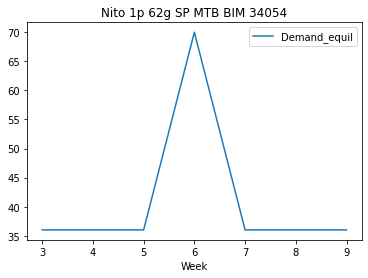

In [230]:
TS.plot(title=product_name(id));